In [18]:
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np

In [38]:
sc.settings.verbosity=4
sc.settings.set_figure_params(dpi=80)
sc.settings.n_jobs = 16

In [3]:
adata = sc.read_loom('/data/xyzeq/xyzeq/individual.raw.and.proc.h5ads/20200324/L20C1_mouse_wTSNE.loom')

In [4]:
adata_raw = sc.read_h5ad('/data/xyzeq/xyzeq/individual.raw.and.proc.h5ads/fig3.L20C1/adata.1.h5ad')

In [5]:
adata_raw = adata_raw[adata.obs_names.values,:].copy()

In [6]:
sc.pp.normalize_per_cell(adata_raw,counts_per_cell_after=1e6)

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [7]:
sc.pp.log1p(adata_raw)

In [8]:
sc.pp.scale(adata_raw)

    ... scale_data: as `zero_center=True`, sparse input is densified and may lead to large memory consumption


In [9]:
adata.raw = adata_raw.copy()

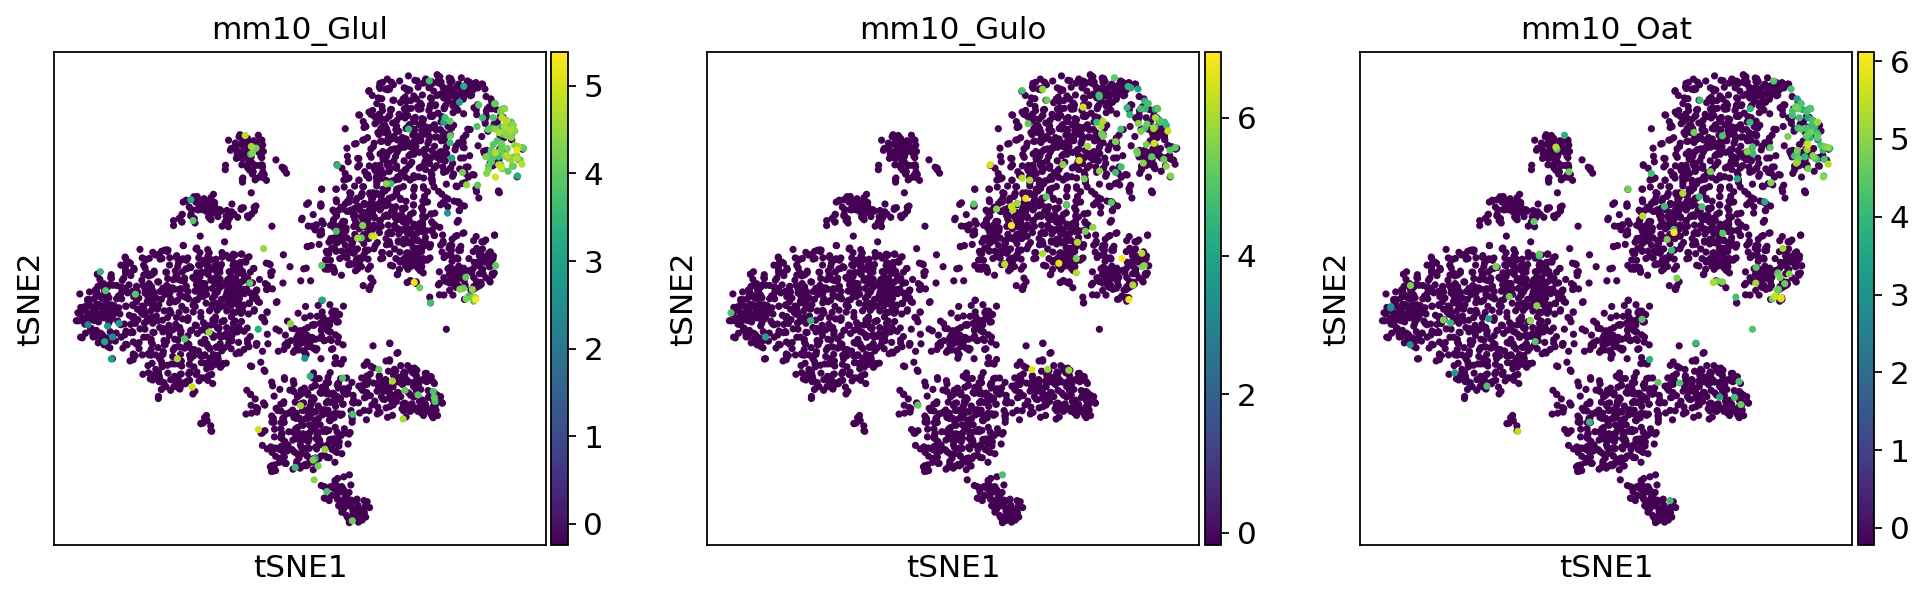

In [11]:
sc.pl.tsne(adata,color=['mm10_Glul', 'mm10_Gulo', 'mm10_Oat'], save='pericentral.feature.plots.svg')

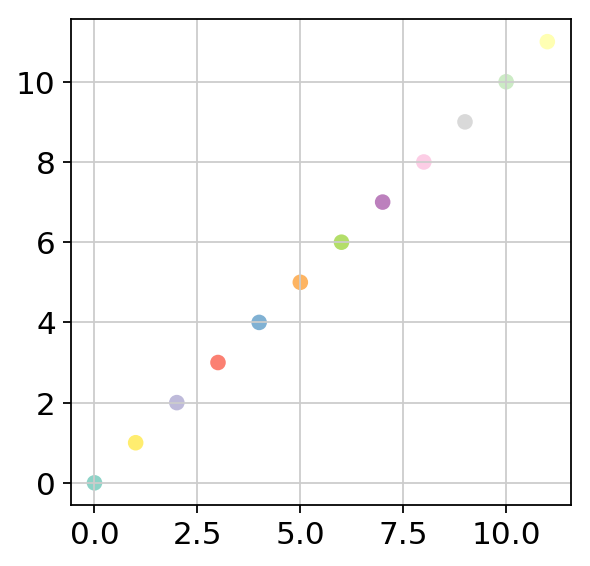

In [20]:
plt.scatter(np.arange(12), np.arange(12), c=['#8DD3C7', '#FFED6F', '#BEBADA', '#FB8072', '#80B1D3', '#FDB462', '#B3DE69', '#BC80BD', '#FCCDE5', '#D9D9D9', '#CCEBC5', '#FFFFB3'])
colors = dict(zip(['turq','dark yel','light purp','coral','blue','orange','light gr','purp','pink','gray','mint','light yel'],
                  ['#8DD3C7', '#FFED6F', '#BEBADA', '#FB8072', '#80B1D3', '#FDB462', '#B3DE69', '#BC80BD', '#FCCDE5', '#D9D9D9', '#CCEBC5', '#FFFFB3']))

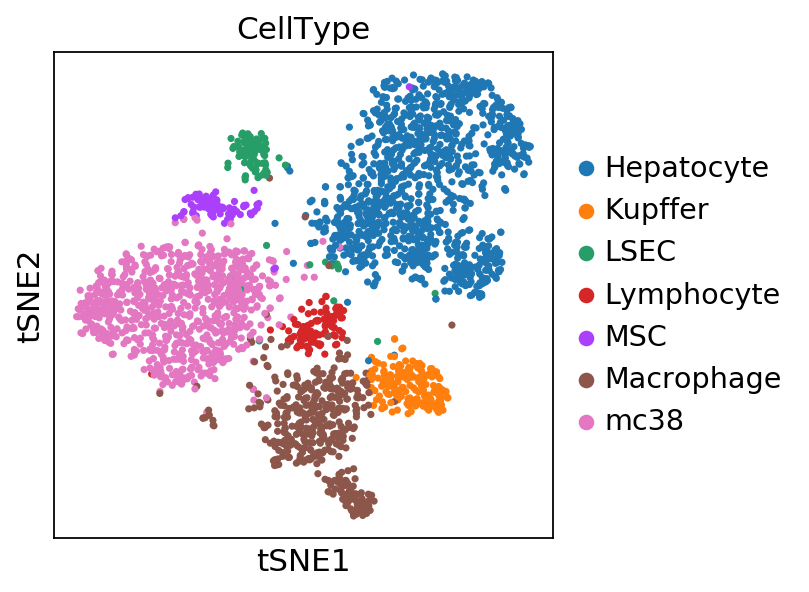

In [14]:
sc.pl.tsne(adata,color=['CellType'])

In [21]:
adata

AnnData object with n_obs × n_vars = 2867 × 744 
    obs: 'CellType', 'barcode', 'cell_call', 'human_counts', 'leiden', 'log_counts', 'louvain', 'mouse_counts', 'n_counts', 'n_genes', 'percent_contam', 'percent_mito_human', 'percent_mito_mouse', 'ratio'
    var: 'log_cells', 'n_cells'
    uns: 'CellType_colors'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'

In [22]:
ctdict = dict()
ctdict['Hepatocytes'] = ['Hepatocyte']
ctdict['Macrophages'] = ['Macrophage']
ctdict['Kupffer Cells'] = ['Kupffer']
ctdict['LSECs'] = ['LSEC']
ctdict['Lymphocytes'] = ['Lymphocyte']
ctdict['MSCs'] = ['MSC']
ctdict['MC38'] = ['mc38']
adata.obs['celltype'] = adata.obs['CellType']
for ct in ctdict:
    for clust in ctdict[ct]:
        adata.obs['celltype'].replace(r'^%s$' % str(clust),ct, regex=True, inplace=True)
adata.obs['celltype'] = adata.obs['celltype'].astype('category')

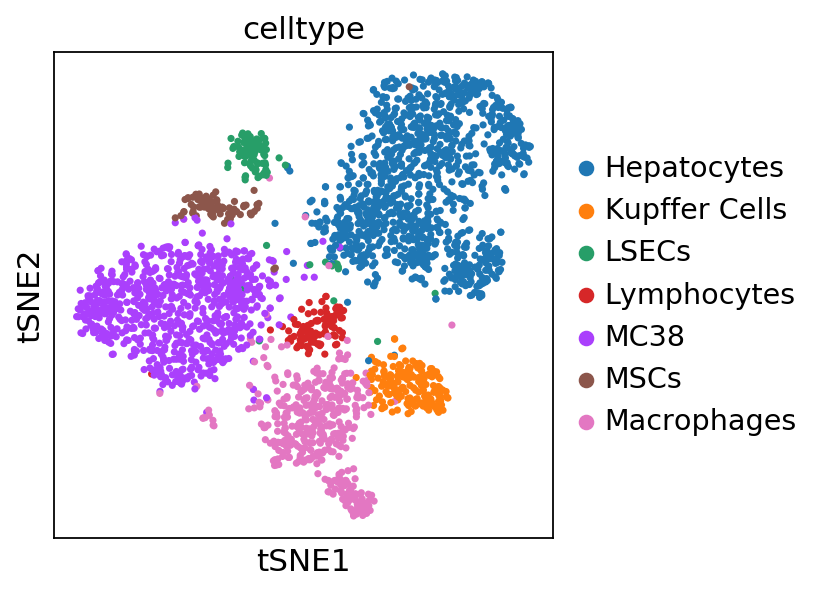

In [23]:
sc.pl.tsne(adata,color=['celltype'])

In [77]:
adata.uns['celltype_colors'] = [
    colors['coral'],
    colors['orange'],
    colors['blue'],
    colors['purp'],
    colors['dark yel'],
    colors['turq'],
    colors['mint']
]

In [44]:
sc.tl.tsne(adata, n_pcs=20)

computing tSNE
    using 'X_pca' with n_pcs = 20
    using the 'MulticoreTSNE' package by Ulyanov (2017)
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:10)


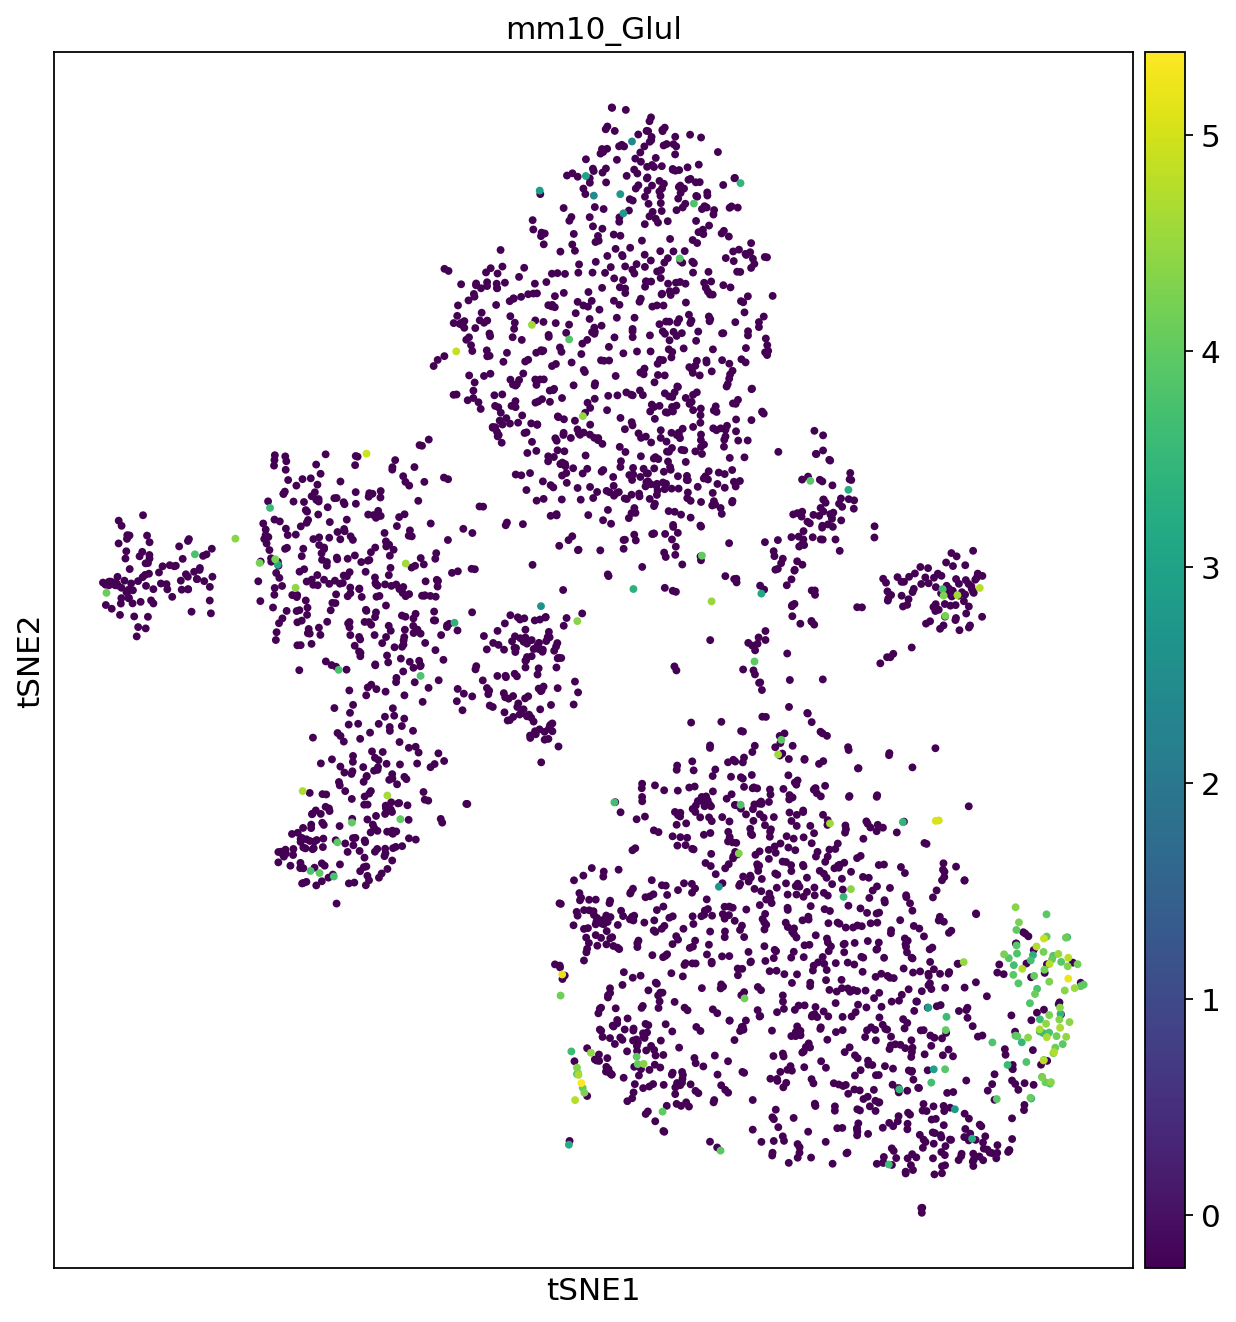

In [48]:
fig, ax = plt.subplots(1,1,figsize=(9.5,10))
sc.pl.tsne(adata,color=['mm10_Glul'], ax=ax,size=50, return_fig=False, show=False);

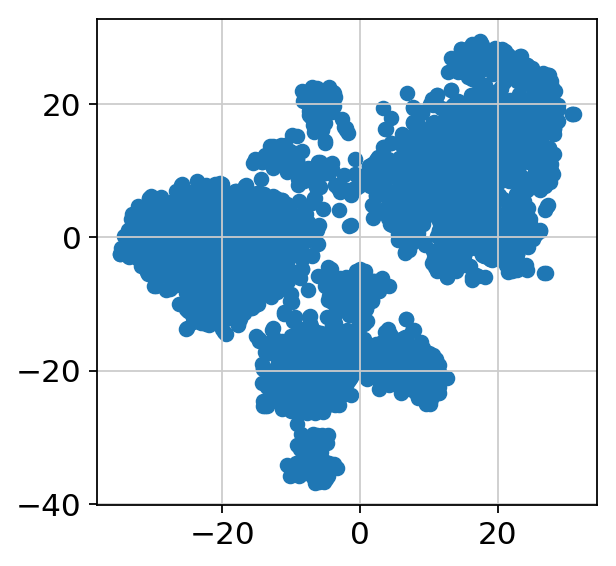

In [54]:
plt.scatter(-adata.obsm['X_tsne'][:,1], adata.obsm['X_tsne'][:,0]);

In [63]:
angle = 100
angle = angle*(np.pi/180)

In [64]:
x = adata.obsm['X_tsne'][:,0]*np.cos(angle)-adata.obsm['X_tsne'][:,1]*np.sin(angle)
y = adata.obsm['X_tsne'][:,0]*np.sin(angle)+adata.obsm['X_tsne'][:,1]*np.cos(angle)

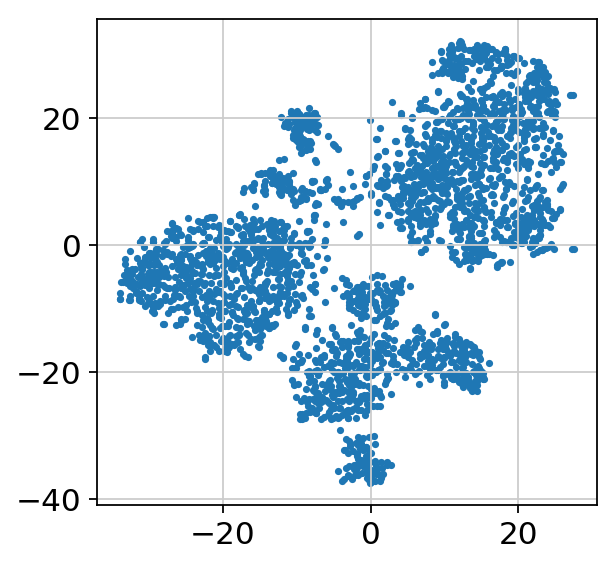

In [65]:
plt.scatter(x, y, s=5);

In [71]:
new_tsne_X = np.stack((x,y)).T

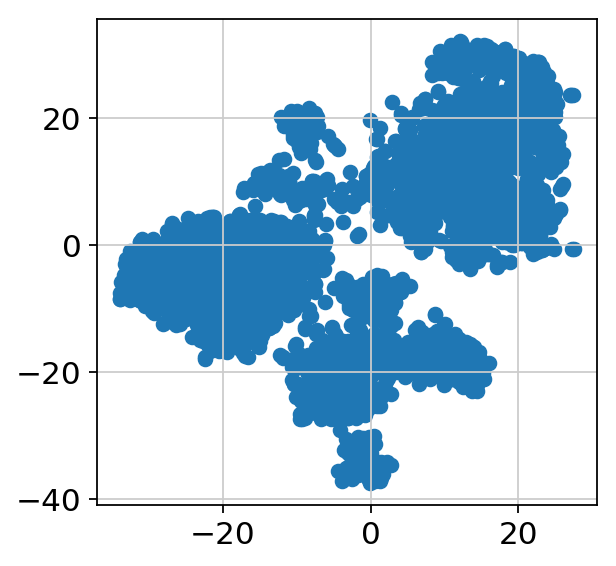

In [72]:
plt.scatter(new_tsne_X[:,0], new_tsne_X[:,1]);

In [74]:
adata.obsm['X_tsne'] = new_tsne_X

In [79]:
fig, ax = plt.subplots(1,1,figsize=(9.5,10))
sc.pl.tsne(adata,color=['celltype'], ax=ax,size=50, return_fig=False, show=False, save='tsne.with.cts.svg');

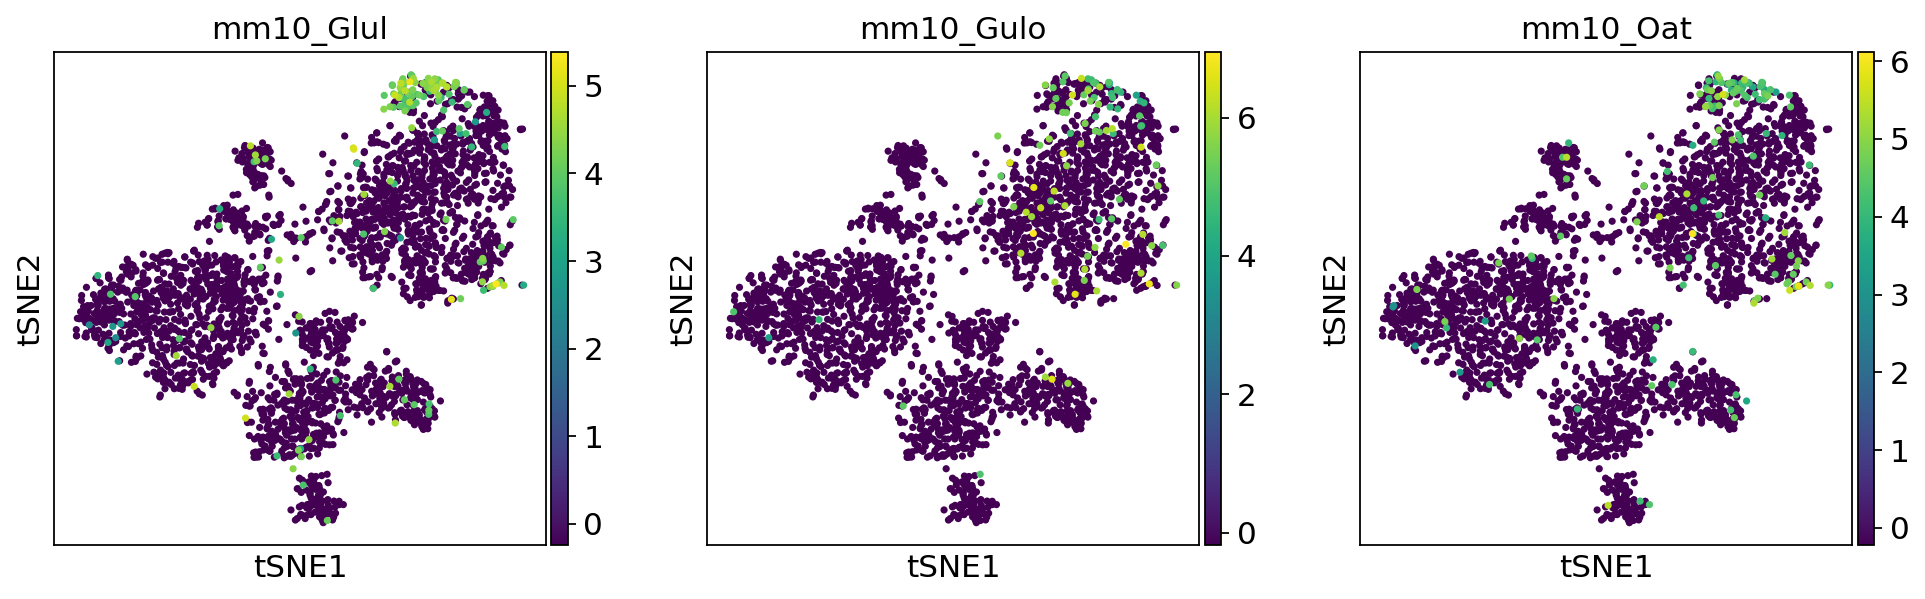

In [83]:
sc.pl.tsne(adata,color=['mm10_Glul', 'mm10_Gulo', 'mm10_Oat'], save='pericentral.feature.plots.svg');

In [1]:
adata

NameError: name 'adata' is not defined